# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\Fauzan Kamil\anaconda3\envs\env_tensor-cv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset


# Dataset Customer
1.   Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016
2.   Sebanyak 64230 customer berjenis kelamin perempuan
3. Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
4. Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
5. Informasi device customer yaitu sebanyak 76637 menggunakan Andorid dan 23363 menggunakan iOS
6. Sebanyak 64230 customer merupakan perempuan dan 35770 merupakan laki-laki
7. Dapat dilihat pada graph di bawah bahwa kebanyakan customer lahir pada rentang waktu 1980 - 2010
8. Dapat dilihat dari visualisasi di bawah, bahwa Jakarta Raya merupakan pemegang jumlah customers terbanyak dan di susul oleh Jawa Barat dan Jawa Tengah di posisi kedua dan ketiga.
9. Adanya tren peningkatan signifikan jumlah customer pada tiap tahunnya yang dimulai dari tahun 2016 hingga 2022

# Dataset Product
1. Banyaknya pembelian suatu produk terjadi di musim panas dan musim gugur. Sedangkan untuk pembelian paling sedikit terjadi di musim semi
2. Banyaknya product yang terjual yaitu berjenis Apparel(pakaian), kemudian disusul oleh penjualan berjenis aksesoris

# Dataset Transaksi
1. Data transaksi dapat disimpulkan bahwa 90% lebih transaksi berhasil dilakukan
2. Untuk jenis pembayaran, pembayaran menggunakan credit card itu yang paling banyak. disusul oleh e-wallet yaitu Ovo dan Gopay yang memiliki jumlah transaksi yang sama. Terakhir penggunaan LinkAja menjadi yang terendah
3. Dari banyaknya transaksi ternyata banyak yang tidak menggunakan promo, daripada yang menggunakan promo. 

# Dataset ClickStream
1. Terdapat 11.548.304 customer mengakses aplikasi menggunakan mobile, dan sebanyak 1.285.298 customer mengakses aplikasi menggunakan web
2. Customer yang menggunakan promo sebanyak 326.535 customer, customer yang menambahkan produk kedalam keranjang sebanyak 1.937.157 customer, kemudian terdapat 852.582 customer, dan terdapat sebanyak 1.173.266 yang melakukan pencarian terhadap produk-produk.

In [2]:
df_customer = pd.read_csv('customer.csv')
df_click_stream = pd.read_csv('click_stream.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('transactions.csv')

In [3]:
df_list = [df_customer, df_product, df_trans, df_click_stream]
for i in df_list:
    i.info()
    print('===========================================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

# Data Preprocessing

## Customer

In [4]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [6]:
df_customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [7]:
df_customer.describe(include="O")

,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location,home_country,first_join_date
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,707,173,100000,100000,2,13003,2,100000,86,33,1,2223
top,Rahmi,Susanti,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1999-07-31,Android,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,Android 2.2.2,Jakarta Raya,Indonesia,2021-07-31
freq,560,1028,1,1,64230,54,76637,1,1296,18715,100000,341


In [8]:
df_customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [9]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30
2016-07-27


In [10]:
df_customer.birthdate.sort_values(ascending=False).head(20)

18437    2016-07-27
95661    2016-02-19
93456    2016-01-29
17262    2016-01-15
35826    2015-10-13
37890    2015-07-19
29371    2015-06-28
70817    2015-06-14
62773    2015-04-07
16333    2015-03-14
16615    2015-03-09
2310     2015-02-11
1403     2015-01-29
90829    2014-12-22
47834    2014-12-20
97162    2014-10-09
32420    2014-10-06
51839    2014-09-02
69462    2014-08-25
74399    2014-07-13
Name: birthdate, dtype: object

In [11]:
df_customer.birthdate.sort_values(ascending=True).head(20)

76383    1954-06-30
97940    1955-01-01
51075    1955-02-14
76788    1955-05-04
76539    1955-06-01
52243    1957-01-02
13873    1957-01-04
15502    1958-08-19
59294    1959-02-28
27158    1960-10-31
13360    1960-11-20
83810    1960-11-29
47851    1961-04-03
77032    1961-07-20
40452    1961-09-06
17233    1962-04-21
14661    1962-06-26
56343    1962-07-11
58820    1962-07-29
85063    1962-07-29
Name: birthdate, dtype: object

In [12]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30
2022-07-31


In [13]:
df_customer.first_join_date.sort_values(ascending=False).head(20)

81493    2022-07-31
53302    2022-07-31
6797     2022-07-31
16385    2022-07-31
1110     2022-07-31
13622    2022-07-31
27279    2022-07-31
49564    2022-07-31
57854    2022-07-31
27322    2022-07-31
91303    2022-07-31
56114    2022-07-31
27330    2022-07-31
5198     2022-07-31
82320    2022-07-31
37041    2022-07-31
85429    2022-07-31
49471    2022-07-31
14594    2022-07-31
16552    2022-07-31
Name: first_join_date, dtype: object

In [14]:
df_customer.first_join_date.sort_values(ascending=True).head(20)

77238    2016-06-30
42782    2016-06-30
76057    2016-06-30
73575    2016-06-30
88919    2016-06-30
78050    2016-06-30
86170    2016-07-01
44347    2016-07-01
5767     2016-07-01
36203    2016-07-01
5708     2016-07-01
73421    2016-07-01
62964    2016-07-01
33957    2016-07-01
9576     2016-07-01
35809    2016-07-01
93141    2016-07-02
55931    2016-07-02
74017    2016-07-02
52067    2016-07-02
Name: first_join_date, dtype: object

In [15]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [16]:
print(df_customer.email.apply(len).min())
print(df_customer.email.apply(len).max())

53
55


In [17]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [18]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

## Transaksi

In [19]:
df_trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [20]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [21]:
# Ubah Tipe Data shipment_date_limit
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

In [22]:
# Ubah tipe data created_id
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

In [23]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
product_metadata                       object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
dtype: object

In [24]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [25]:
# Cek Data Unik
df_trans.nunique()

created_at                852584
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       852584
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [26]:
# Cek Missing Value
df_trans.isnull().sum()
# 526048 missing value pada kolom promo_code
# di drop saja kah ? karena missing value nya banyak
# df_trans['promo_code'].value_counts()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [27]:
# Handling Missing Value
#df_trans.dropna(subset=['promo_code'], inplace=True)
df_trans['promo_code'].fillna('NOPROMO', inplace=True)
#df_trans['promo_code'].value_counts()
#df_trans.isnull().sum()

In [28]:
print('total pembelian tertinggi: ',df_trans['total_amount'].max())
print('total pembelian terendah: ',df_trans['total_amount'].min())

total pembelian tertinggi:  23504487
total pembelian terendah:  10898


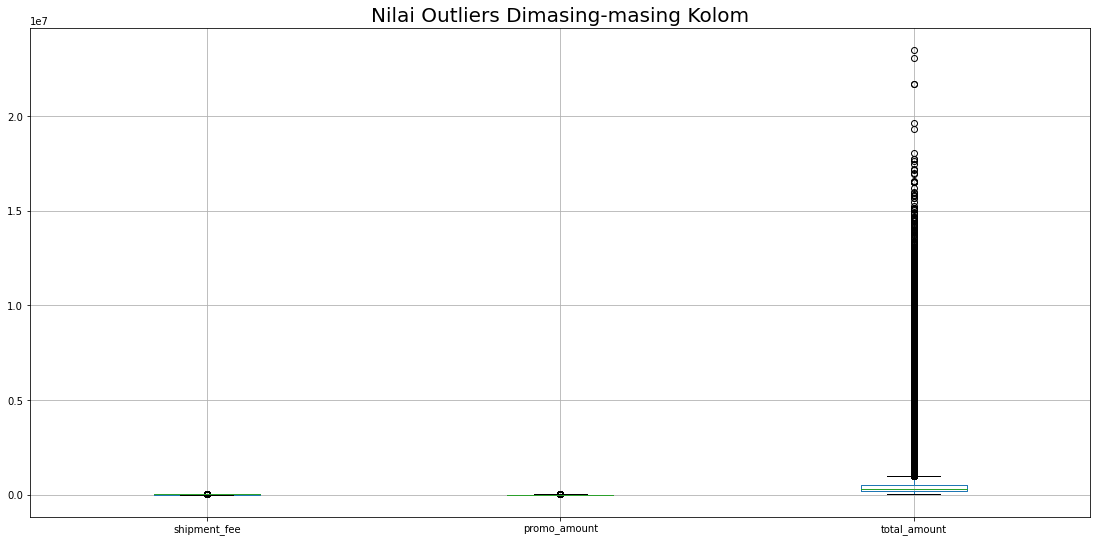

In [29]:
# Cek Data Outlier
# df_trans['total_amount'].describe()
cols = ['shipment_fee','promo_amount','total_amount']
plt.figure(figsize=(19,9))
df_trans[cols].boxplot()
plt.title('Nilai Outliers Dimasing-masing Kolom', fontsize=20)
plt.show()
# Untuk shipment_fee dan promo_amount tidak ada outliers
# Untuk total_amount ada outliers 
# Untul total_amount outliers nya di biarkan saja atau mau di handling?

In [30]:
# Cek Outliers Dengan Z Score
# Referensi : https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_zscore(df_trans[col])
  print('Outliers Dengan Metode Z Score(', col, ')', len(data_outlier[col]), 'outlier :', data_outlier[col])
  print('=====================================================================================================')


Outliers Dengan Metode Z Score( shipment_fee ) 27672 outlier : [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000

In [31]:
'''
# Handling Outliers (total_amount)
mean_total_amount = np.mean(df_trans['total_amount'])
mean_total_amount

for i in data_outlier['total_amount']:
    df_trans['total_amount'] = np.where(df_trans['total_amount'] == i, mean_total_amount, df_trans['total_amount'])
detect_outliers_zscore(df_trans['total_amount'])
'''

"\n# Handling Outliers (total_amount)\nmean_total_amount = np.mean(df_trans['total_amount'])\nmean_total_amount\n\nfor i in data_outlier['total_amount']:\n    df_trans['total_amount'] = np.where(df_trans['total_amount'] == i, mean_total_amount, df_trans['total_amount'])\ndetect_outliers_zscore(df_trans['total_amount'])\n"

In [32]:
# Cek Outliers Dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in data:
        if (i < lower_bound) or (i > upper_bound):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = detect_outliers_iqr(df_trans[col])
    print('Outliers Dengan Metode IQR(', col, ')', len(data_outlier[col]), 'outlier :', data_outlier[col])
    print('=====================================================================================================')


Outliers Dengan Metode IQR( shipment_fee ) 27672 outlier : [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50

In [33]:
# Handling Outliers (total_amount)
q1 = df_trans['total_amount'].quantile(0.25)
q3 = df_trans['total_amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
# Handling Outliers (total_amount)
df_trans['total_amount'] = np.where(df_trans['total_amount'] > upper_bound, upper_bound, df_trans['total_amount'])
df_trans['total_amount'] = np.where(df_trans['total_amount'] < lower_bound, lower_bound, df_trans['total_amount'])

Lower Bound : -262569.0
Upper Bound : 981065.0


In [34]:
# Handling Outliers (shipment_fee)
q1 = df_trans['shipment_fee'].quantile(0.25)
q3 = df_trans['shipment_fee'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
# Handling Outliers (shipment_fee)
df_trans['shipment_fee'] = np.where(df_trans['shipment_fee'] > upper_bound, upper_bound, df_trans['shipment_fee'])
df_trans['shipment_fee'] = np.where(df_trans['shipment_fee'] < lower_bound, lower_bound, df_trans['shipment_fee'])

Lower Bound : -15000.0
Upper Bound : 25000.0


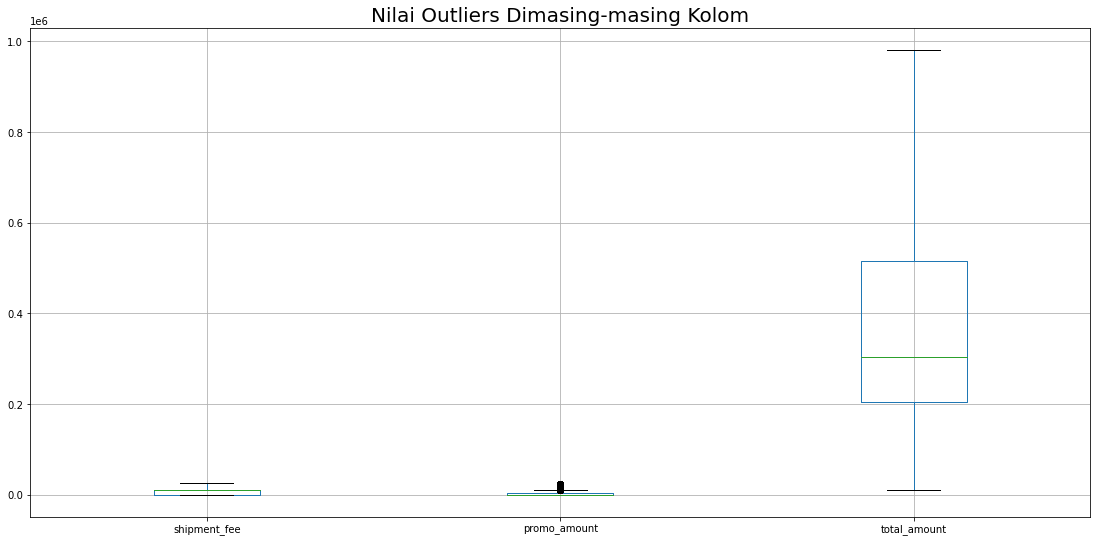

In [35]:
# Cek outliers setelah di handling dengan IQR
plt.figure(figsize=(19,9))
df_trans[cols].boxplot()
plt.title('Nilai Outliers Dimasing-masing Kolom', fontsize=20)
plt.show()
# Outliers sudah tidak ada
# Ini kalo mau di handling, kalo ga mau di handling juga gpp

In [36]:
# Membuat Kolom id dengan product_id isi dari kolom product metadata
df_trans['id'] = df_trans.product_metadata.str[15:21]
df_trans['id'] = pd.to_numeric(df_trans['id'], errors='coerce')

In [37]:
# Membuat Kolom qty dengan quantity dari kolom product metadata
df_trans['qty'] = df_trans.product_metadata.str[34:36]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['qty'] = pd.to_numeric(df_trans['qty'], errors='coerce')
#df_trans['qty'].value_counts()

In [38]:
# Membuat Kolom price dengan item_price dari kolom product metadata
df_trans['price'] = df_trans.product_metadata.str[51:58]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['price'] = pd.to_numeric(df_trans['price'], errors='coerce')
#df_trans['price'].value_counts()

In [39]:
pembelian_awal = df_trans.groupby(['customer_id'])['created_at'].min()
pembelian_awal = pd.DataFrame(data = pembelian_awal).reset_index()
pembelian_awal = pembelian_awal.rename(columns = {'created_at' : 'tanggal_pembelian_awal'})
#pembelian_awal.head()

In [40]:
pembelian_akhir = df_trans.groupby(['customer_id'])['created_at'].max()
pembelian_akhir = pd.DataFrame(data = pembelian_akhir).reset_index()
pembelian_akhir = pembelian_akhir.rename(columns = {'created_at' : 'tanggal_pembelian_akhir'})
#pembelian_akhir.head()

In [41]:
# Merge pembelian awal dan pembelian akhir
df_selisih = pd.merge(pembelian_awal, pembelian_akhir, on='customer_id')
df_selisih.head()

,customer_id,tanggal_pembelian_awal,tanggal_pembelian_akhir
0,3,2018-08-25 18:54:03.844494+00:00,2022-06-26 15:41:52.844494+00:00
1,8,2021-02-13 09:47:39.656991+00:00,2022-05-15 22:46:22.656991+00:00
2,9,2021-06-27 01:51:48.421034+00:00,2022-05-28 08:44:32.421034+00:00
3,11,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00
4,15,2019-09-30 04:47:36.105040+00:00,2022-01-05 06:07:58.105040+00:00


In [42]:
# Selisih Pembelian Awal dan Pembelian Akhir
df_selisih['selisih_pembelian'] = (df_selisih['tanggal_pembelian_akhir'] - df_selisih['tanggal_pembelian_awal']).dt.days
df_selisih.head()

,customer_id,tanggal_pembelian_awal,tanggal_pembelian_akhir,selisih_pembelian
0,3,2018-08-25 18:54:03.844494+00:00,2022-06-26 15:41:52.844494+00:00,1400
1,8,2021-02-13 09:47:39.656991+00:00,2022-05-15 22:46:22.656991+00:00,456
2,9,2021-06-27 01:51:48.421034+00:00,2022-05-28 08:44:32.421034+00:00,335
3,11,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00,0
4,15,2019-09-30 04:47:36.105040+00:00,2022-01-05 06:07:58.105040+00:00,828


In [43]:
df_selisih['rata_1x_beli'] = df_selisih['selisih_pembelian'] / df_trans['total_amount']*100
df_selisih['rata_1x_beli'].value_counts()

0.000000    10385
0.025686       22
0.085621       19
0.036695       18
0.034248       18
            ...  
0.160827        1
0.488658        1
0.236399        1
0.077849        1
0.370892        1
Name: rata_1x_beli, Length: 36866, dtype: int64

In [44]:
# Kateogri Pembelian
kategori_rata_rata = []
for x in df_selisih['rata_1x_beli']:
    if (x <= 6) & (x >= 1):
        kategori_rata_rata.append(1) # aktif = 1
    else:
        kategori_rata_rata.append(0) # tidak aktif = 0
ktg_rata_rata = pd.DataFrame({'status_cust':kategori_rata_rata})
df_selisih['status_cust'] = ktg_rata_rata
df_selisih['status_cust'].value_counts()

0    48830
1     1875
Name: status_cust, dtype: int64

In [45]:
# Pembelian paling banyak per bulan
mod_bulan = df_trans.groupby(['customer_id'])['created_at'].max().dt.month
mod_bulan = pd.DataFrame(data = mod_bulan).reset_index()
mod_bulan = mod_bulan.rename(columns = {'created_at' : 'bulan_pembelian_paling_banyak'})
mod_bulan.head()

,customer_id,bulan_pembelian_paling_banyak
0,3,6
1,8,5
2,9,5
3,11,3
4,15,1


In [46]:
# Pembelian paling banyak per hari
mod_tanggal = df_trans.groupby(['customer_id'])['created_at'].max().dt.day
mod_tanggal = pd.DataFrame(data = mod_tanggal).reset_index()
mod_tanggal = mod_tanggal.rename(columns = {'created_at' : 'tanggal_pembelian_paling_banyak'})
mod_tanggal.head()

,customer_id,tanggal_pembelian_paling_banyak
0,3,26
1,8,15
2,9,28
3,11,7
4,15,5


In [47]:
# Waktu pembelian paling banyak
mod_waktu = df_trans.groupby(['customer_id'])['created_at'].max().dt.hour
mod_waktu = pd.DataFrame(data = mod_waktu).reset_index()
mod_waktu = mod_waktu.rename(columns = {'created_at' : 'waktu_pembelian_paling_banyak'})
mod_waktu.head()

,customer_id,waktu_pembelian_paling_banyak
0,3,15
1,8,22
2,9,8
3,11,14
4,15,6


In [48]:
# Kelompokan waktu pembelian
waktu_pembelian = []
for x in mod_waktu['waktu_pembelian_paling_banyak']:
    if   5 <= x <= 11:
        waktu_pembelian.append('pagi')
    elif  11 <= x <= 15:
        waktu_pembelian.append('siang')
    elif  15 <= x <= 18:
        waktu_pembelian.append('sore')
    else:
        waktu_pembelian.append('malam')
ktg_waktu = pd.DataFrame({'kategori_waktu':waktu_pembelian})
mod_waktu['kategori_waktu'] = ktg_waktu
mod_waktu['kategori_waktu'].value_counts()

malam    26019
pagi     12990
siang     6496
sore      5200
Name: kategori_waktu, dtype: int64

In [49]:
# Standar deviasi total amount
std_total_amount = df_trans.groupby(['customer_id'])['total_amount'].std()
std_total_amount = pd.DataFrame(data = std_total_amount).reset_index()
std_total_amount = std_total_amount.rename(columns = {'total_amount' : 'std_total_amount'})
std_total_amount.head()

,customer_id,std_total_amount
0,3,248420.046857
1,8,333468.915011
2,9,244186.576755
3,11,NaN
4,15,360930.193556


In [50]:
# Rata-rata total amount
rata_total_amount = df_trans.groupby(['customer_id'])['total_amount'].mean()
rata_total_amount = pd.DataFrame(data = rata_total_amount).reset_index()
rata_total_amount = rata_total_amount.rename(columns = {'total_amount' : 'rata_total_amount'})
rata_total_amount.head()

,customer_id,rata_total_amount
0,3,374919.411765
1,8,528957.857143
2,9,439777.500000
3,11,197533.000000
4,15,407568.200000


In [51]:
# Merge data
df_data_merge = pd.merge(mod_bulan, mod_tanggal, on='customer_id', how='left')
df_data_merge = pd.merge(df_data_merge, mod_waktu, on='customer_id', how='left')
df_data_merge = pd.merge(df_data_merge, std_total_amount, on='customer_id', how='left')
df_data_merge = pd.merge(df_data_merge, rata_total_amount, on='customer_id', how='left')
df_data_merge = pd.merge(df_data_merge, df_selisih, on='customer_id', how='left')
df_data_merge.head()

,customer_id,bulan_pembelian_paling_banyak,tanggal_pembelian_paling_banyak,waktu_pembelian_paling_banyak,kategori_waktu,std_total_amount,rata_total_amount,tanggal_pembelian_awal,tanggal_pembelian_akhir,selisih_pembelian,rata_1x_beli,status_cust
0,3,6,26,15,siang,248420.046857,374919.411765,2018-08-25 18:54:03.844494+00:00,2022-06-26 15:41:52.844494+00:00,1400,0.700588,0
1,8,5,15,22,malam,333468.915011,528957.857143,2021-02-13 09:47:39.656991+00:00,2022-05-15 22:46:22.656991+00:00,456,0.293199,0
2,9,5,28,8,pagi,244186.576755,439777.500000,2021-06-27 01:51:48.421034+00:00,2022-05-28 08:44:32.421034+00:00,335,0.060832,0
3,11,3,7,14,siang,NaN,197533.000000,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00,0,0.000000,0
4,15,1,5,6,pagi,360930.193556,407568.200000,2019-09-30 04:47:36.105040+00:00,2022-01-05 06:07:58.105040+00:00,828,0.416597,0


## Produk

In [52]:
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [53]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [54]:
df_product.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [55]:
df_customer.describe(include="O")

,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location,home_country,first_join_date
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,707,173,100000,100000,2,13003,2,100000,86,33,1,2223
top,Rahmi,Susanti,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1999-07-31,Android,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,Android 2.2.2,Jakarta Raya,Indonesia,2021-07-31
freq,560,1028,1,1,64230,54,76637,1,1296,18715,100000,341


In [56]:
df_product.duplicated().sum()

0

In [57]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [58]:
df_product[df_product.articleType == "Face Moisturisers"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,61,61,61,61,60,61,48,61
unique,1,1,2,1,10,1,1,60
top,Women,Personal Care,Skin,Face Moisturisers,White,Spring,Casual,Lotus Herbals Cocomoist Moisturising Lotion
freq,61,61,54,61,27,61,48,2


In [59]:
#Mengubah tipe data kolom year
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [60]:
fixed_product = df_product.copy()

In [61]:
df_product[df_product.articleType == "Jeans"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,609,609,609,609,603,609,609,609
unique,5,1,1,1,11,4,1,299
top,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Locomotive Men Washed Blue Jeans
freq,332,609,609,609,446,359,609,27


In [62]:
df_product[df_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,605,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,103,613,601,7


In [63]:
df_product[df_product.articleType == "Face Moisturisers"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,61,61,61,61,60,61,48,61
unique,1,1,2,1,10,1,1,60
top,Women,Personal Care,Skin,Face Moisturisers,White,Spring,Casual,Lotus Herbals Cocomoist Moisturising Lotion
freq,61,61,54,61,27,61,48,2


In [64]:
df_product[df_product.baseColour.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [65]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Face Moisturisers)
fixed_product.at[15526, "baseColour"] = "White"

In [66]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Jeans)
fixed_product.at[6206, "baseColour"] = "Blue"
fixed_product.at[9516, "baseColour"] = "Blue"
fixed_product.at[12763, "baseColour"] = "Blue"
fixed_product.at[15708, "baseColour"] = "Blue"
fixed_product.at[20209, "baseColour"] = "Blue"
fixed_product.at[34553, "baseColour"] = "Blue"

In [67]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist)
fixed_product.at[14291, "baseColour"] = "Blue"
fixed_product.at[17268, "baseColour"] = "Blue"
fixed_product.at[17639, "baseColour"] = "Blue"
fixed_product.at[23484, "baseColour"] = "Blue"
fixed_product.at[37531, "baseColour"] = "Blue"
fixed_product.at[40675, "baseColour"] = "Blue"
fixed_product.at[43260, "baseColour"] = "Blue"
fixed_product.at[44224, "baseColour"] = "Blue"

In [68]:
fixed_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [69]:
fixed_product['season'] = fixed_product['season'].fillna(fixed_product['season'].mode()[0])

In [70]:
fixed_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [71]:
df_product.loc[21270:21274, :]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21270,5411,Women,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,Tribord To 100 Basic Lady Ss11
21271,44736,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2012.0,Formal,U.S. Polo Assn. Men Black Formal Shoes
21272,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,NaN,Sports,Puma Men Blue Sless Round Neck T-shirt
21273,34441,Women,Apparel,Topwear,Tshirts,Yellow,Summer,2012.0,Casual,Myntra Women Peace Love Chocolate Yellow T-shirt
21274,6294,Men,Apparel,Topwear,Tshirts,Green,Summer,2011.0,Casual,UCB Men's Super Star Print Green T-shirt


In [72]:
#Mengubah missing value pada kolom year dengan mode
fixed_product['year'] = fixed_product['year'].fillna(fixed_product['year'].mode()[0])

In [73]:
df_product[df_product.productDisplayName.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [74]:
df_product[df_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,605,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,103,613,601,7


In [75]:
df_product[(df_product.articleType == "Clutches") & (df_product.baseColour == "Maroon")].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,12,12,12,12,12,12,12,11
unique,1,1,1,1,1,2,1,8
top,Women,Accessories,Bags,Clutches,Maroon,Summer,Casual,Lino Perros Women Maroon Clutch
freq,12,12,12,12,12,9,12,3


In [76]:
df_product[(df_product.articleType == "Clutches") & (df_product.baseColour == "Brown")].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,17,17,17,17,17,17,17,16
unique,1,1,1,1,1,3,1,13
top,Women,Accessories,Bags,Clutches,Brown,Summer,Casual,Rocia Women Brown Clutch
freq,17,17,17,17,17,14,17,3


In [77]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist) dan baseColour
fixed_product.at[3677, "productDisplayName"] = "Lino Perros Women Maroon Clutch"
fixed_product.at[22089, "productDisplayName"] = "Rocia Women Brown Clutch"

In [78]:
df_product[df_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,605,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,103,613,601,7


In [79]:
#Mengubah missing value pada kolom productDisplayName dengan mode
fixed_product['productDisplayName'] = fixed_product['productDisplayName'].fillna(fixed_product['productDisplayName'].mode()[0])

In [80]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [81]:
fixed_product.usage.describe(include="O")

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object

In [82]:
df_product[df_product.usage.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
511,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017.0,NaN,Lakme Sheer Satin Lip Gloss 51
...,...,...,...,...,...,...,...,...,...,...
43633,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44079,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44224,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44227,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [83]:
#Mengubah missing value pada kolom usage dengan mode
fixed_product['usage'] = fixed_product['usage'].fillna(fixed_product['usage'].mode()[0])

In [84]:
fixed_product.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

## Clickstream

In [85]:
df_click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [86]:
df_click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [87]:
df_click_stream.shape

(12833602, 6)

In [88]:
df_click_stream.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [89]:
# Hapus missing value pada kolom event_metadata
df_click_stream = df_click_stream.dropna(subset=['event_metadata'])
#df_click_stream.isna().sum()

In [90]:
#mengubah tipe data yang tidak sesuai
df_click_stream['event_time'] = pd.to_datetime(df_click_stream['event_time'])
#df_click_stream.info()

In [91]:
#df_click_stream.event_metadata.str[30:].value_counts()

In [92]:
df_click_stream.event_metadata.value_counts().head(11)

{'payment_status': 'Success'}             815962
{'search_keywords': 'Dress Kondangan'}    256194
{'search_keywords': 'Tas Wanita'}         128790
{'search_keywords': 'Bekas'}              112269
{'search_keywords': 'T-Shirt'}            100087
{'search_keywords': 'Baju'}                83873
{'search_keywords': 'Kaos'}                83759
{'search_keywords': 'Dress Pesta'}         76829
{'search_keywords': 'Sepatu Nike'}         51578
{'search_keywords': 'Tas Kerja'}           38677
{'payment_status': 'Failed'}               36620
Name: event_metadata, dtype: int64

In [93]:
"""
plt.figure(figsize=(10,5))
df_click_stream.event_metadata.value_counts().head(11).plot(kind='bar')
plt.title('Top 10 event_metadata')
plt.show()
"""

"\nplt.figure(figsize=(10,5))\ndf_click_stream.event_metadata.value_counts().head(11).plot(kind='bar')\nplt.title('Top 10 event_metadata')\nplt.show()\n"

# Merge Data

In [94]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   product_metadata        852584 non-null  object             
 5   payment_method          852584 non-null  object             
 6   payment_status          852584 non-null  object             
 7   promo_amount            852584 non-null  int64              
 8   promo_code              852584 non-null  object             
 9   shipment_fee            852584 non-null  float64            
 10  shipment_date_limit     852584 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   85

In [95]:
# Merge dataset
df = pd.merge(df_click_stream,df_trans,how='left',on='session_id' )
df = pd.merge(df,fixed_product,how='left',on='id' )
df = pd.merge(df, df_customer, how='left', on='customer_id')
df = pd.merge(df, df_data_merge, how='left', on='customer_id')


In [96]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,created_at,customer_id,booking_id,product_metadata,...,tanggal_pembelian_paling_banyak,waktu_pembelian_paling_banyak,kategori_waktu,std_total_amount,rata_total_amount,tanggal_pembelian_awal,tanggal_pembelian_akhir,selisih_pembelian,rata_1x_beli,status_cust
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,"[{'product_id': 15315, 'quantity': 4, 'item_pr...",...,24.0,13.0,siang,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0
1,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,"[{'product_id': 15315, 'quantity': 4, 'item_pr...",...,24.0,13.0,siang,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0
2,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'},2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,"[{'product_id': 15315, 'quantity': 4, 'item_pr...",...,24.0,13.0,siang,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431+00:00,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",2019-09-09 12:17:55.425431+00:00,18770.0,022def29-0956-483a-b27c-ae69263351ef,"[{'product_id': 6133, 'quantity': 2, 'item_pri...",...,24.0,13.0,siang,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431+00:00,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",2019-09-09 12:17:55.425431+00:00,18770.0,022def29-0956-483a-b27c-ae69263351ef,"[{'product_id': 6133, 'quantity': 2, 'item_pri...",...,24.0,13.0,siang,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0


In [97]:
df.drop(['product_metadata'], axis=1, inplace=True)

In [98]:
df.dtypes

session_id                                      object
event_name                                      object
event_time                         datetime64[ns, UTC]
event_id                                        object
traffic_source                                  object
event_metadata                                  object
created_at                         datetime64[ns, UTC]
customer_id                                    float64
booking_id                                      object
payment_method                                  object
payment_status                                  object
promo_amount                                   float64
promo_code                                      object
shipment_fee                                   float64
shipment_date_limit                datetime64[ns, UTC]
shipment_location_lat                          float64
shipment_location_long                         float64
total_amount                                   float64
id        

# New Feature

## Recency

In [99]:
# Recency 
# Menghitung recency dari tanggal terakhir transaksi 
df['recency'] = (df['tanggal_pembelian_akhir'].max() - df['tanggal_pembelian_akhir']).dt.days

In [100]:
df['recency'].value_counts()

1.0       114060
0.0       108532
3.0        99450
4.0        97089
6.0        94154
           ...  
1985.0         2
1174.0         2
2095.0         2
1888.0         2
1853.0         2
Name: recency, Length: 2063, dtype: int64

In [101]:
df['recency'].describe()

count    4.208246e+06
mean     6.454624e+01
std      1.439721e+02
min      0.000000e+00
25%      1.200000e+01
50%      3.300000e+01
75%      6.000000e+01
max      2.221000e+03
Name: recency, dtype: float64

## Frequency


In [102]:
# Frequency
# Menghitung frekuensi pembelia
frequency = df.groupby('customer_id')[['qty']].count().sort_values(by='qty', ascending=False).reset_index()
frequency.rename(columns={'qty':'frequency_pembelian'}, inplace=True)
frequency.head()

,customer_id,frequency_pembelian
0,29496.0,2854
1,43202.0,2730
2,82237.0,2499
3,10167.0,2390
4,69740.0,2351


In [103]:
# Kategori frekuensi pembelian
kategori_frekuensi = []
for i in frequency['frequency_pembelian']:
    if i <= 5:
        kategori_frekuensi.append('0') # 0 = Sedikit
    else:
        kategori_frekuensi.append('1') # 1 = Banyak
df_ktg = pd.DataFrame(kategori_frekuensi, columns=['kategori_frekuensi'])
frequency['kategori_frekuensi'] = kategori_frekuensi
frequency.head()

,customer_id,frequency_pembelian,kategori_frekuensi
0,29496.0,2854,1
1,43202.0,2730,1
2,82237.0,2499,1
3,10167.0,2390,1
4,69740.0,2351,1


In [104]:
frequency['kategori_frekuensi'].value_counts()

1    43068
0     7636
Name: kategori_frekuensi, dtype: int64

In [105]:
# Menggabungkan data frequency dengan data df
df = pd.merge(df, frequency, how='left', on='customer_id')
df.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,created_at,customer_id,booking_id,payment_method,...,std_total_amount,rata_total_amount,tanggal_pembelian_awal,tanggal_pembelian_akhir,selisih_pembelian,rata_1x_beli,status_cust,recency,frequency_pembelian,kategori_frekuensi
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,Gopay,...,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0,7.0,657.0,1
1,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,Gopay,...,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0,7.0,657.0,1
2,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'},2019-09-01 12:15:29.425431+00:00,18770.0,47c126bc-989d-4001-a153-a3fc5685e9b5,Gopay,...,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0,7.0,657.0,1
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431+00:00,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",2019-09-09 12:17:55.425431+00:00,18770.0,022def29-0956-483a-b27c-ae69263351ef,Gopay,...,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0,7.0,657.0,1
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431+00:00,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",2019-09-09 12:17:55.425431+00:00,18770.0,022def29-0956-483a-b27c-ae69263351ef,Gopay,...,287962.156543,441402.781955,2019-09-01 12:15:29.425431+00:00,2022-07-24 13:49:35.425431+00:00,1057.0,0.386442,0.0,7.0,657.0,1


## Monetary


In [106]:
# Monetary
# Menghitung total pembelian per customer
monetary = df.groupby('customer_id')['price'].sum().sort_values(ascending=False).reset_index()

In [107]:
monetary.rename(columns={'price':'monetary'}, inplace=True)
monetary.head()

,customer_id,monetary
0,29496.0,599489308.0
1,43202.0,549953428.0
2,64659.0,493879164.0
3,10167.0,486702009.0
4,69740.0,471672076.0


In [108]:
# gabungkan data monetary dengan data df
df = pd.merge(df, monetary, how='left', on='customer_id')

Monetary menunjukan berapa total orderan yang dilakukan oleh pelanggan. Monetary yang tinggi menunjukan bahwa pelanggan tersebut sudah menjadi pelanggan loyal. Namun jika monetary nya rendah maka pelanggan tersebut belum menjadi pelanggan loyal.

## Tenure

In [109]:
# Tenure 
# Jumlah bulan yang telah berlangganan
df['tenure'] = (df['tanggal_pembelian_akhir'] - df['tanggal_pembelian_awal']).dt.days /30
df['tenure'].value_counts()

0.000000     60864
48.000000    20675
56.000000    19220
54.600000    16128
67.200000    16109
             ...  
16.366667        9
5.433333         8
27.633333        7
3.766667         6
10.433333        5
Name: tenure, Length: 2087, dtype: int64

## MonthlyCharges

In [110]:
# MonthlyCharges
df['monthly_charges'] = (df['monetary'] / df['tenure']).round(2)

In [111]:
df['monthly_charges'].value_counts()

inf           49919
8920971.85     2854
0.00           2749
7513024.97     2730
6950662.99     2499
              ...  
60002.14          4
179974.76         4
3014685.00        4
25027.57          4
197935.81         4
Name: monthly_charges, Length: 40066, dtype: int64

In [112]:
# Replace infinity value with mean value 
df['monthly_charges'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['monthly_charges'].fillna(df['monthly_charges'].mean(), inplace=True)

## TotalCharges

In [113]:
# TotalCharges
df['total_charges'] = df['price'] * df['qty'] + df['shipment_fee']

In [114]:
df['total_charges'].value_counts()

302618.0     258
198246.0     202
576724.0     172
260242.0     164
409650.0     163
            ... 
2333314.0      2
644236.0       2
383897.0       2
629689.0       2
412815.0       2
Name: total_charges, Length: 343275, dtype: int64

## Cek Korelasi 
Variabel yang memiliki korelasi tinggi dengan kategori_rata_rata akan dijadikan sebagai variabel prediktor. Variabel yang memiliki korelasi rendah dengan kategori_rata_rata akan dijadikan sebagai variabel target.

In [115]:
df_korel = df.corr(method='spearman')
df_korel = pd.DataFrame(df_korel).reset_index()
df_korel.rename(columns={'index':'feature'}, inplace=True)
df_korel[['feature', 'status_cust']]

,feature,status_cust
0,customer_id,-0.004666
1,promo_amount,0.036804
2,shipment_fee,-0.000042
3,shipment_location_lat,0.002362
4,shipment_location_long,-0.003968
5,total_amount,-0.000745
6,id,-0.000176
7,qty,0.001716
8,price,0.000244
9,year,-0.000323


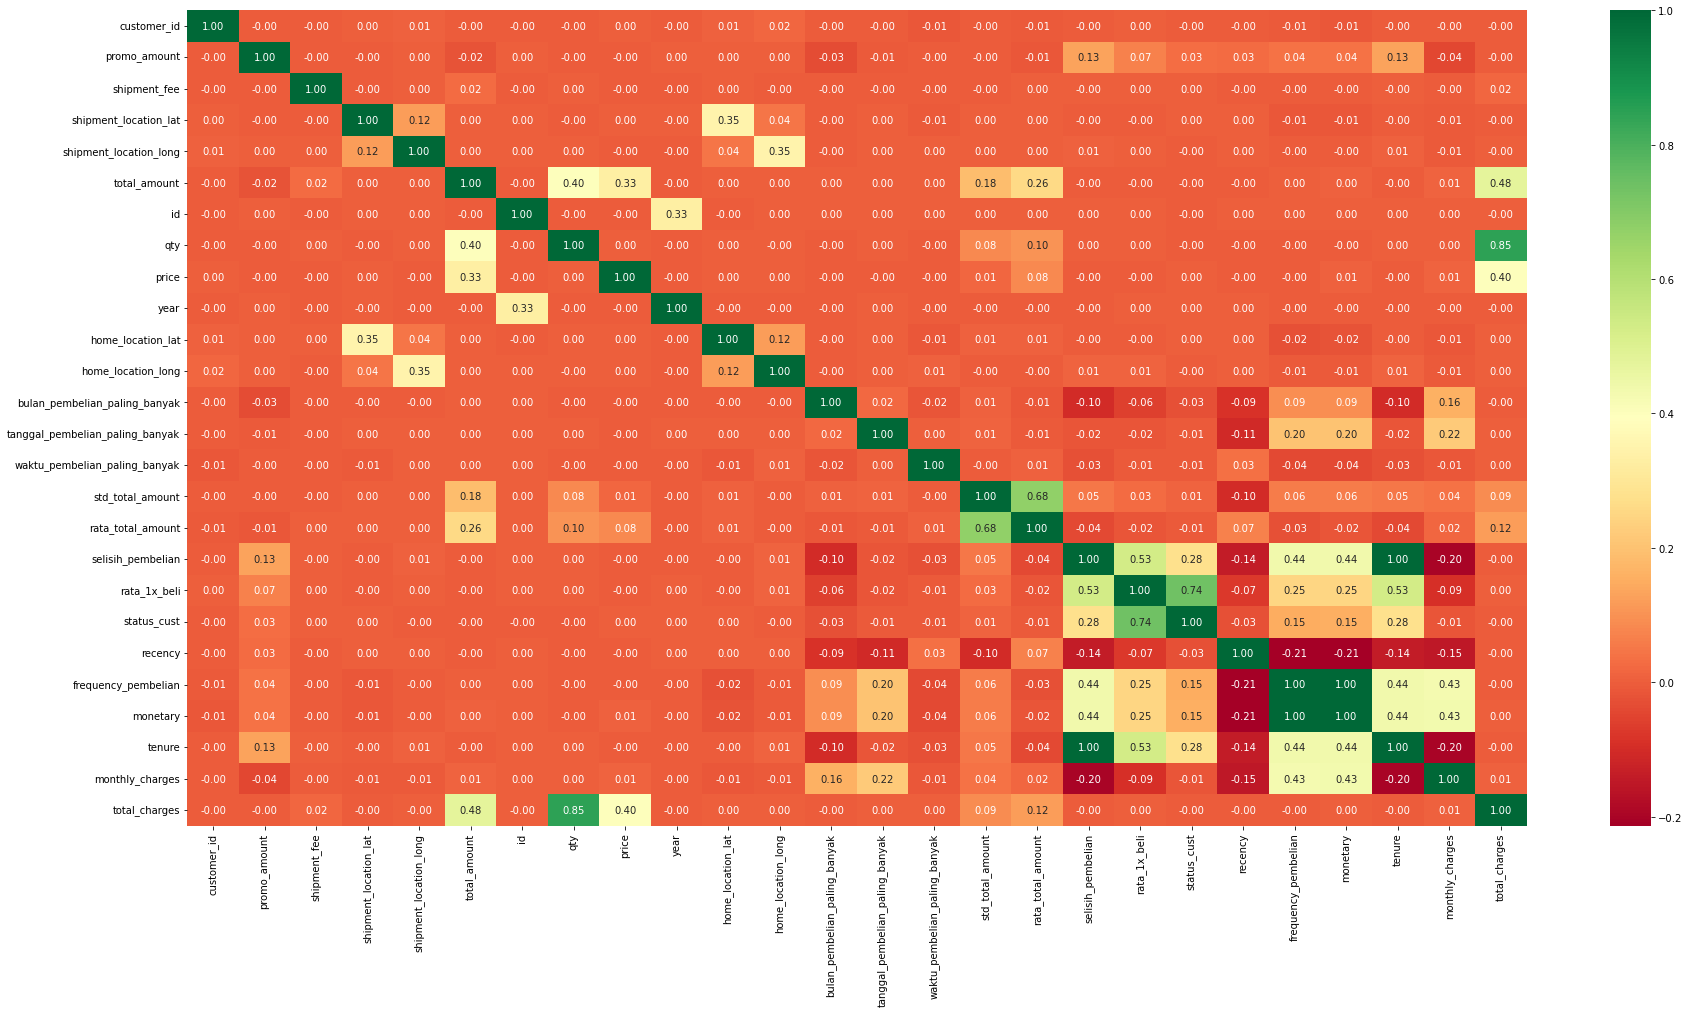

In [116]:
# Cek korelasi antar variabel
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Data Preprocessing

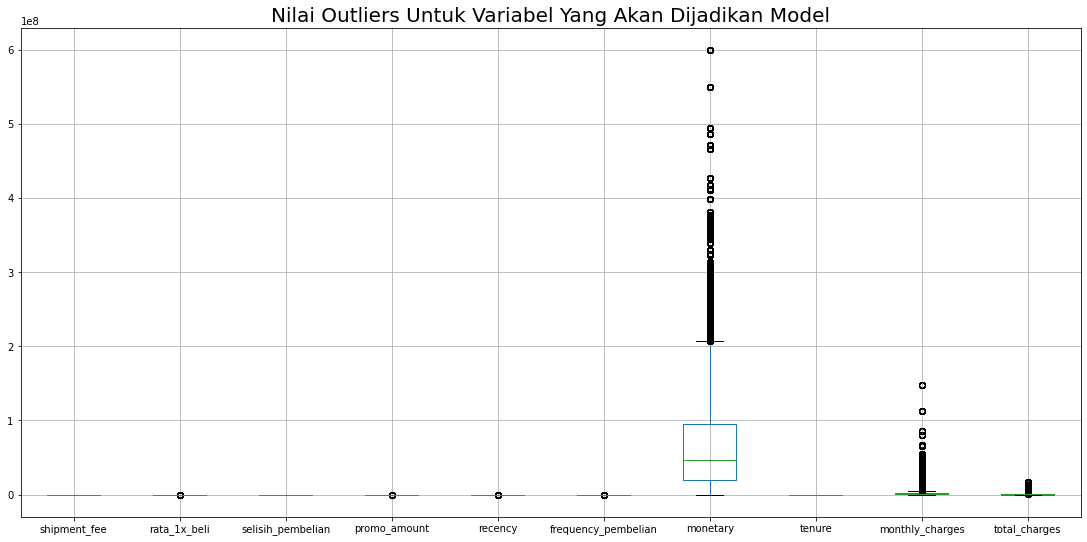

In [117]:
# Cek outlier untuk variabel yang memiliki korelasi tinggi dengan status_cust
col = ['shipment_fee','rata_1x_beli','selisih_pembelian','promo_amount','recency', 'frequency_pembelian', 'monetary', 'tenure', 'monthly_charges', 'total_charges']
plt.figure(figsize=(19,9))
df[col].boxplot()
plt.title('Nilai Outliers Untuk Variabel Yang Akan Dijadikan Model', fontsize=20)
plt.show()

In [118]:
# Handling Outliers (Monetary)
q1 = df['monetary'].quantile(0.25)
q3 = df['monetary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
# Handling outliers
df['monetary'] = np.where(df['monetary'] > upper_bound, upper_bound, df['monetary'])
df['monetary'] = np.where(df['monetary'] < lower_bound, lower_bound, df['monetary'])

Lower Bound : -92153142.0
Upper Bound : 207253506.0


In [119]:
# Handling Outliers (Monthly Charges)
q1 = df['monthly_charges'].quantile(0.25)
q3 = df['monthly_charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
# Handling outliers
df['monthly_charges'] = np.where(df['monthly_charges'] > upper_bound, upper_bound, df['monthly_charges'])
df['monthly_charges'] = np.where(df['monthly_charges'] < lower_bound, lower_bound, df['monthly_charges'])

Lower Bound : -2043389.2500000002
Upper Bound : 5268355.95


In [120]:
# Handling Outliers (Total Charges)
q1 = df['total_charges'].quantile(0.25)
q3 = df['total_charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
# Handling outliers
df['total_charges'] = np.where(df['total_charges'] > upper_bound, upper_bound, df['total_charges'])
df['total_charges'] = np.where(df['total_charges'] < lower_bound, lower_bound, df['total_charges'])

Lower Bound : -84064.0
Upper Bound : 672264.0


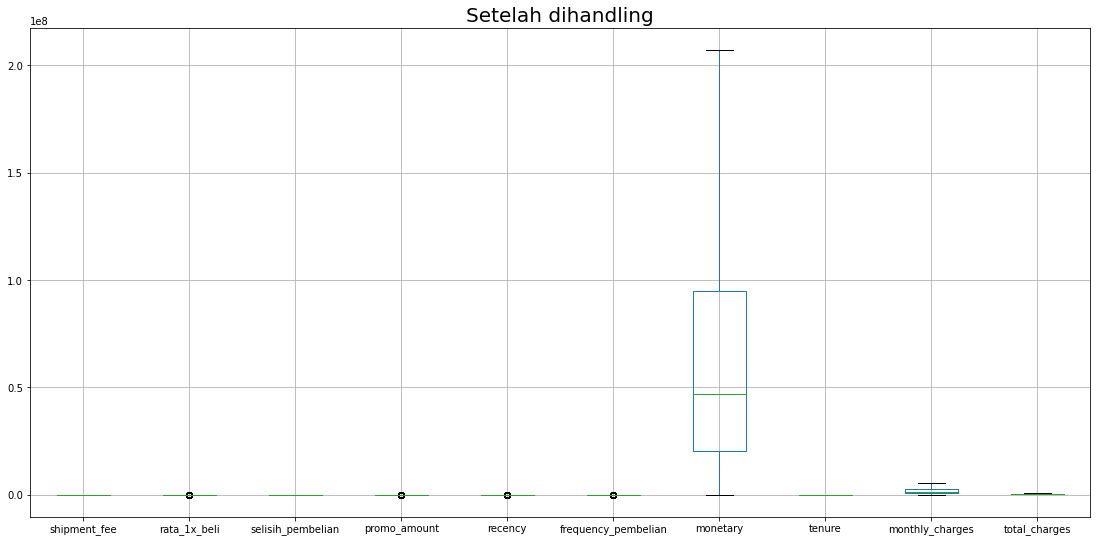

In [121]:
# Cek outliers setelah handling
plt.figure(figsize=(19,9))
df[col].boxplot()
plt.title('Setelah dihandling', fontsize=20)
plt.show()

In [122]:
# Cek misiing value
df[['shipment_fee','rata_1x_beli','selisih_pembelian','promo_amount','recency', 'frequency_pembelian', 'monetary', 'tenure', 'monthly_charges', 'total_charges','status_cust']].isnull().sum()

shipment_fee            81294
rata_1x_beli            81294
selisih_pembelian       81294
promo_amount            81294
recency                 81294
frequency_pembelian     81294
monetary                81294
tenure                  81294
monthly_charges             0
total_charges          967193
status_cust             81294
dtype: int64

In [123]:
# Handling missing value dengan median (Total Charges)
df['total_charges'].fillna(df['total_charges'].median(), inplace=True)

In [124]:
# Handling missing value dengan median (Shipment Fee)
df['shipment_fee'].fillna(df['shipment_fee'].median(), inplace=True)

In [125]:
# Handling missing value dengan median (Promo Amount)
df['promo_amount'].fillna(df['promo_amount'].median(), inplace=True)

In [126]:
# Handling missing value dengan median (Recency)
df['recency'].fillna(df['recency'].median(), inplace=True)

In [127]:
# Handling missing value dengan median (Frequency Pembelian)
df['frequency_pembelian'].fillna(df['frequency_pembelian'].median(), inplace=True)

In [128]:
# handling missing value dengan median (rata_1x_beli)
df['rata_1x_beli'].fillna(df['rata_1x_beli'].median(), inplace=True)

In [129]:
# Handling missing value dengan median (selisih_pembelian)
df['selisih_pembelian'].fillna(df['selisih_pembelian'].median(), inplace=True)

In [130]:
# Handling missing value dengan median (monetary)
df['monetary'].fillna(df['monetary'].median(), inplace=True)

In [131]:
# Handling missing value dengan median (tenure)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [132]:
# Handling missing value dengan modus (status_cust)
df['status_cust'].fillna(df['status_cust'].mode()[0], inplace=True)

# Model Base Line

## Train Test Split

In [133]:
# Train Test Split
X = df[['shipment_fee','rata_1x_beli','selisih_pembelian','promo_amount','recency', 'frequency_pembelian', 'monetary', 'tenure', 'monthly_charges', 'total_charges']]
y = df['status_cust']

In [134]:
# Cek imbalance data
from imblearn.over_sampling import SMOTE
y.value_counts()

0.0    3914598
1.0     374942
Name: status_cust, dtype: int64

In [135]:
from collections import Counter
X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0.0, 3914598), (1.0, 3914598)]


In [136]:
# Scaling Data dengan MinMaxScaler karena data memiliki range yang berbeda beda 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)


[[0.         0.05965364 0.47741644 ... 0.47741644 0.76759558 1.        ]
 [0.         0.05965364 0.47741644 ... 0.47741644 0.76759558 1.        ]
 [0.         0.05965364 0.47741644 ... 0.47741644 0.76759558 1.        ]
 ...
 [0.4        0.17198319 0.98373984 ... 0.98373984 0.40172713 0.26581949]
 [0.4        0.4409711  0.5266486  ... 0.5266486  0.28410276 0.30465546]
 [0.4        0.34955923 0.75519422 ... 0.75519422 0.05689028 0.15509049]]


In [137]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=True)

In [138]:
# Model : Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
# Grid Search Logistic Regression
start_time = time.time()
param_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300, 400, 500]}
grid_lr = GridSearchCV(LogisticRegression(), param_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print('Waktu Training Grid Search Logistic Regression :', time.time() - start_time, 'detik')
print('Best Parameter :', grid_lr.best_params_)
print('Best Score     :', grid_lr.best_score_)
print('Best Estimator :', grid_lr.best_estimator_)

# Akurasi
print('Akurasi Train    :', accuracy_score(y_train, grid_lr.predict(X_train)))
print('Akurasi Test     :', accuracy_score(y_test, grid_lr.predict(X_test)))
print('Classification Report :\n', classification_report(y_test, grid_lr.predict(X_test)))

In [ ]:
# MSE
mse = mean_squared_error(y_test, grid_lr.predict(X_test))
print('MSE Grid Search Logistic Regression     :', mse)
# R2
r2 = r2_score(y_test, grid_lr.predict(X_test))
print('R2 Grid Search Logistic Regression      :', r2)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, grid_lr.predict(X_test)))
print('RMSE Grid Search Logistic Regression    :', rmse)
# MAE
mae = mean_absolute_error(y_test, grid_lr.predict(X_test))
print('MAE Grid Search Logistic Regression     :', mae)
# MAPE
mape = mean_absolute_percentage_error(y_test, grid_lr.predict(X_test))
print('MAPE Grid Search Logistic Regression    :', mape)


In [139]:
# Model : Logistic Regression
model_lr = LogisticRegression(solver='lbfgs',penalty='l2',C=50000.0, max_iter=750)

In [140]:
start_time = time.time()
model_lr.fit(X_train, y_train)
print('Waktu Training Logistic Regresion', time.time() - start_time, 'detik')

LogisticRegression(C=50000.0, max_iter=750)

In [141]:
# Prediksi
y_pred = model_lr.predict(X_test)
y_pred[:5]

array([1., 1., 0., 1., 1.])

In [143]:
# Evaluasi Model
print('Akurasi Train    :', accuracy_score(y_train, model_lr.predict(X_train)))
print('Akurasi Test     :', accuracy_score(y_test, model_lr.predict(X_test)))
print('Classification Report :\n', classification_report(y_test, y_pred))

Akurasi Train    : 0.9985178554732823
Akurasi Test     : 0.9985278181820969
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1956594
         1.0       0.99      1.00      1.00   1958004

    accuracy                           1.00   3914598
   macro avg       1.00      1.00      1.00   3914598
weighted avg       1.00      1.00      1.00   3914598



In [150]:
def model_validation_metrics(confusion_matrix):
  tn, fp, fn, tp = confusion_matrix.ravel()
  return (tp+tn)/(tp+tn+fp+fn),tp/(tp+fp),tp/(tp+fn)

def roc_curve_func(y_true,y_score):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict(X_test))
  roc_auc = roc_auc_score(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(20,15))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")

In [151]:
y_train_pred=model_lr.predict(X_train)
y_train_pred_proba=model_lr.predict_proba(X_train)[:,1]

cm_train=confusion_matrix(y_train, y_train_pred)

<AxesSubplot:>

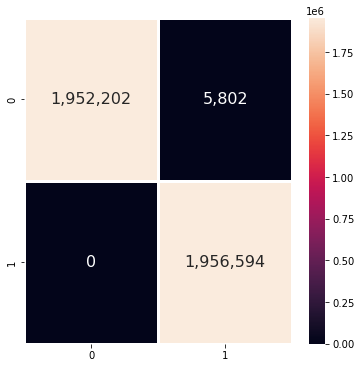

In [152]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_train,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

In [147]:
accuracy,precision,recall=model_validation_metrics(cm_train)
print('Akurasi  :', accuracy)
print('Presisi  : ', precision)
print('Recall   : ', recall)

Akurasi  : 0.9985178554732823
Presisi  :  0.9970434101985532
Recall   :  1.0


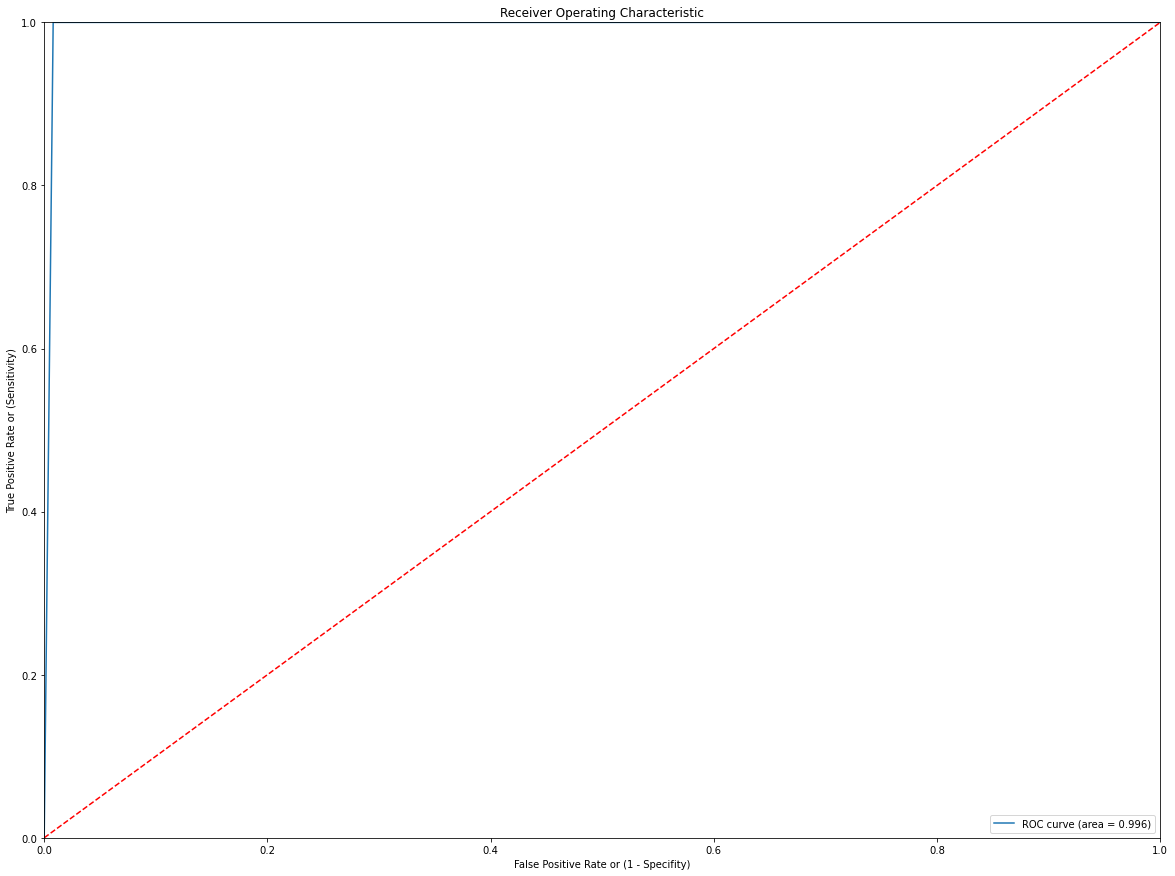

In [153]:
roc_curve_func(y_train,y_train_pred_proba)

In [149]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE Logistic Regresi     :', mse)
# R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Logistic Regresi      :', r2)
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Logistic Regresi    :', rmse)
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE Logistic Regresi     :', mae)
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE Logistic Regresi    :', mape)

MSE Logistic Regresi     : 0.0040175261929832895
R2 Logistic Regresi      : 0.9839298931431792
RMSE Logistic Regresi    : 0.063383958483068
MAE Logistic Regresi     : 0.0040175261929832895
MAPE Logistic Regresi    : 18093329465670.75


In [ ]:
# Ann
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
model_ann = Sequential()
model_ann.add(Dense(32, input_dim=30, activation='relu'))
model_ann.add(Dense(16, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model_ann.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

In [ ]:
# Predict
y_pred = model_ann.predict(X_test)
y_pred 

In [ ]:
# Akurasi
model_ann.evaluate(X_test, y_test)

In [ ]:
# Model Report
model_ann.summary()